In [0]:
dbutils.library.installPyPI('FBProphet', version='0.5') 
dbutils.library.installPyPI('holidays','0.9.12') 

dbutils.library.restartPython()

In [0]:
from pyspark.sql.types import *

# structure of the training data set
train_schema = StructType([
  StructField('date', DateType()),
  StructField('store', IntegerType()),
  StructField('item', IntegerType()),
  StructField('sales', IntegerType())
  ])

# read the training file into a dataframe
train = spark.read.csv(
  '/FileStore/tables/train-1.csv', 
  header=True, 
  schema=train_schema, 
  )

# make the dataframe queriable as a temporary view
train.createOrReplaceTempView('train')

In [0]:
%sql
select year(date) as year,
sum(sales) as sales ,item as Product,store as Store

from train
where item = 5 
-- item is item number 
GROUP BY year(date),item,store
ORDER BY year(date),store;




year,sales,Product,Store
2013,6025,1,1
2013,8530,1,2
2013,7603,1,3
2013,6973,1,4
2013,5092,1,5
2013,5101,1,6
2013,4704,1,7
2013,8122,1,8
2013,7063,1,9
2013,7510,1,10


In [0]:
%sql

SELECT
  year(date) as year, 
  sum(sales) as sales
FROM train
GROUP BY year(date)
ORDER BY year;

year,sales
2013,7941243
2014,9135482
2015,9536887
2016,10357160
2017,10733740


In [0]:
%sql

SELECT 
  TRUNC(date, 'MM') as month,
  SUM(sales) as sales
FROM train
GROUP BY TRUNC(date, 'MM')
ORDER BY month;

month,sales
2013-01-01,454904
2013-02-01,459417
2013-03-01,617382
2013-04-01,682274
2013-05-01,763242
2013-06-01,795597
2013-07-01,855922
2013-08-01,766761
2013-09-01,689907
2013-10-01,656587


In [0]:
%sql

SELECT
  CAST(DATE_FORMAT(date, 'dd') as Integer) % 7 as weekday
FROM (
  SELECT 
    date,
    SUM(sales) as sales
  FROM train
  GROUP BY date)

weekday
1
5
0
2
5
5
2
5
5
6


In [0]:
%sql

SELECT
  YEAR(date) as year,
  CAST(DATE_FORMAT(date, 'u') as Integer) % 7 as weekday,
  --CONCAT(DATE_FORMAT(date, 'u'), '-', DATE_FORMAT(date, 'EEEE')) as weekday,
  AVG(sales) as sales
FROM (
  SELECT 
    date,
    SUM(sales) as sales
  FROM train
  GROUP BY date
 ) x
GROUP BY year, CAST(DATE_FORMAT(date, 'u') as Integer) --, CONCAT(DATE_FORMAT(date, 'u'), '-', DATE_FORMAT(date, 'EEEE'))
ORDER BY year, weekday;

year,weekday,sales
2013,0,25788.44230769231
2013,1,17269.69230769231
2013,2,20015.811320754718
2013,3,20150.153846153848
2013,4,21503.19230769231
2013,5,23071.096153846152
2013,6,24532.903846153848
2014,0,29901.0
2014,1,19791.98076923077
2014,2,23179.346153846152


In [0]:
sql_statement = '''
  SELECT
    CAST(date as date) as ds,
    sales as y
  FROM train
  WHERE store=1 AND item=1
  ORDER BY ds
  '''

# assemble dataset in Pandas dataframe
history_pd = spark.sql(sql_statement).toPandas()

# drop any missing records
history_pd = history_pd.dropna()

In [0]:
from fbprophet import Prophet
import logging

# disable informational messages from fbprophet
logging.getLogger('py4j').setLevel(logging.ERROR)

INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.

In [0]:

# set model parameters
model = Prophet(
  interval_width=0.95,
  growth='linear',
  daily_seasonality=False,
  weekly_seasonality=True,
  yearly_seasonality=True,
  seasonality_mode='multiplicative'
  )

# fit the model to historical data
model.fit(history_pd)

Out[5]: <fbprophet.forecaster.Prophet at 0x7fdd19b6f978>

In [0]:
# define a dataset including both historical dates & 90-days beyond the last available date
future_pd = model.make_future_dataframe(
  periods=1085, 
  freq='d', 
  include_history=True
  )

# predict over the dataset
forecast_pd = model.predict(future_pd)

display(forecast_pd)

ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
2013-01-01T00:00:00.000+0000,15.603139715768306,1.2375436553599228,19.22797596386701,15.603139715768306,15.603139715768306,-0.356023317327815,-0.356023317327815,-0.356023317327815,-0.08884753072620905,-0.08884753072620905,-0.08884753072620905,-0.2671757866016059,-0.2671757866016059,-0.2671757866016059,0.0,0.0,0.0,10.048058153431093
2013-01-02T00:00:00.000+0000,15.608836236487353,1.6575544308080694,18.091857542834443,15.608836236487353,15.608836236487353,-0.3256699666337138,-0.3256699666337138,-0.3256699666337138,-0.05903196920294723,-0.05903196920294723,-0.05903196920294723,-0.26663799743076655,-0.26663799743076655,-0.26663799743076655,0.0,0.0,0.0,10.525507060159415
2013-01-03T00:00:00.000+0000,15.614532757206398,2.2862699211480404,19.27984577322111,15.614532757206398,15.614532757206398,-0.29230176164020893,-0.29230176164020893,-0.29230176164020893,-0.025389716700157106,-0.025389716700157106,-0.025389716700157106,-0.26691204494005183,-0.26691204494005183,-0.26691204494005183,0.0,0.0,0.0,11.050377325086219
2013-01-04T00:00:00.000+0000,15.620229277925446,4.439511384503487,20.18046217883927,15.620229277925446,15.620229277925446,-0.21629242102190085,-0.21629242102190085,-0.21629242102190085,0.051666147212591815,0.051666147212591815,0.051666147212591815,-0.26795856823449266,-0.26795856823449266,-0.26795856823449266,0.0,0.0,0.0,12.241692070485774
2013-01-05T00:00:00.000+0000,15.625925798644491,4.851717383581306,21.506983608996812,15.625925798644491,15.625925798644491,-0.11826586296454089,-0.11826586296454089,-0.11826586296454089,0.1514484894828309,0.1514484894828309,0.1514484894828309,-0.2697143524473718,-0.2697143524473718,-0.2697143524473718,0.0,0.0,0.0,13.777912199447918
2013-01-06T00:00:00.000+0000,15.631622319363538,6.0862320549717,22.575005663062658,15.631622319363538,15.631622319363538,-0.08027841922546172,-0.08027841922546172,-0.08027841922546172,0.19181657092891044,0.19181657092891044,0.19181657092891044,-0.27209499015437216,-0.27209499015437216,-0.27209499015437216,0.0,0.0,0.0,14.376740389635588
2013-01-07T00:00:00.000+0000,15.637318840082584,-0.4817125287563468,16.29977730859717,15.637318840082584,15.637318840082584,-0.4966600410582783,-0.4966600410582783,-0.4966600410582783,-0.2216619909945789,-0.2216619909945789,-0.2216619909945789,-0.27499805006369943,-0.27499805006369943,-0.27499805006369943,0.0,0.0,0.0,7.870887422925779
2013-01-08T00:00:00.000+0000,15.643015360801632,1.7675726747731662,18.294907380129267,15.643015360801632,15.643015360801632,-0.3671541874581153,-0.3671541874581153,-0.3671541874581153,-0.08884753072617603,-0.08884753072617603,-0.08884753072617603,-0.2783066567319393,-0.2783066567319393,-0.2783066567319393,0.0,0.0,0.0,9.899616766611693
2013-01-09T00:00:00.000+0000,15.64871188152068,1.6665681038170466,18.694503106786716,15.64871188152068,15.64871188152068,-0.3409253446436948,-0.3409253446436948,-0.3409253446436948,-0.05903196920326247,-0.05903196920326247,-0.05903196920326247,-0.2818933754404323,-0.2818933754404323,-0.2818933754404323,0.0,0.0,0.0,10.313669390083358
2013-01-10T00:00:00.000+0000,15.654408402239724,1.819657918349296,19.569751443117916,15.654408402239724,15.654408402239724,-0.3110140064594736,-0.3110140064594736,-0.3110140064594736,-0.02538971670085523,-0.02538971670085523,-0.02538971670085523,-0.2856242897586183,-0.2856242897586183,-0.2856242897586183,0.0,0.0,0.0,10.785668126306302


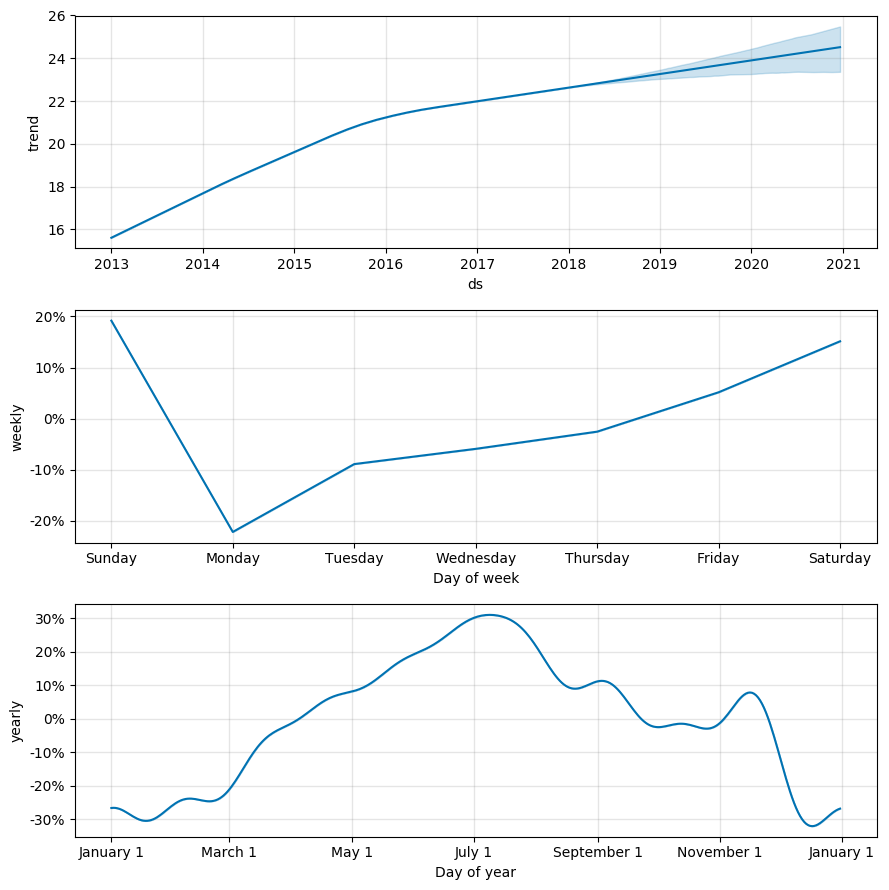

In [0]:
trends_fig = model.plot_components(forecast_pd)
display(trends_fig)

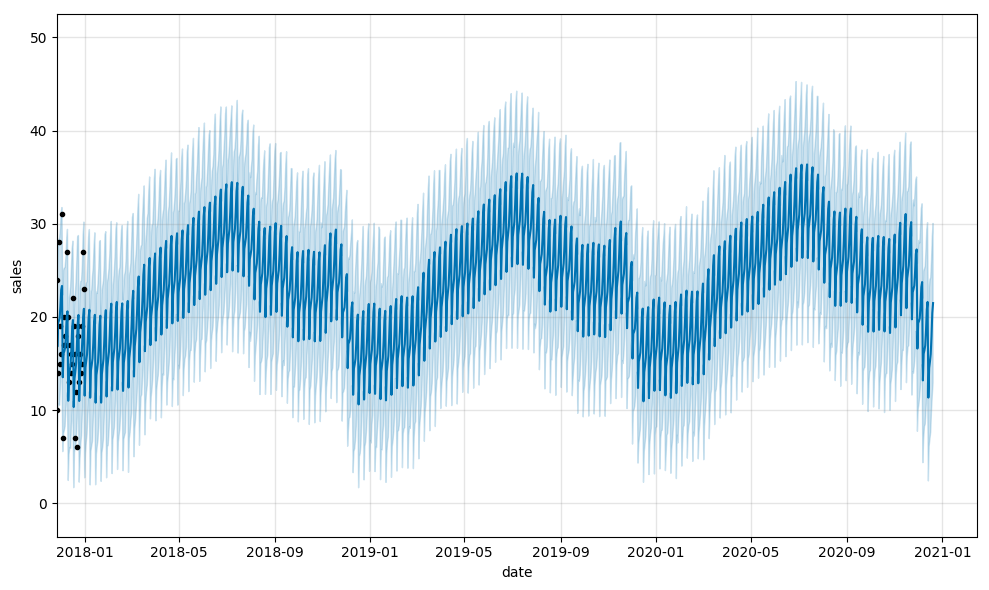

In [0]:
predict_fig = model.plot( forecast_pd, xlabel='date', ylabel='sales')

# adjust figure to display dates from last year + the 90 day forecast
xlim = predict_fig.axes[0].get_xlim()
new_xlim = ( xlim[1]-(180.0+1085.0), xlim[1]-90.0)
predict_fig.axes[0].set_xlim(new_xlim)

display(predict_fig)

In [0]:


from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from datetime import date

# get historical actuals & predictions for comparison
actuals_pd = history_pd[ history_pd['ds'] < date(2018, 1, 1) ]['y']
predicted_pd = forecast_pd[ forecast_pd['ds'] < date(2018, 1, 1) ]['yhat']

# calculate evaluation metrics
mae = mean_absolute_error(actuals_pd, predicted_pd)
mse = mean_squared_error(actuals_pd, predicted_pd)
rmse = sqrt(mse)

# print metrics to the screen
print( '\n'.join(['MAE: {0}', 'MSE: {1}', 'RMSE: {2}']).format(mae, mse, rmse) )

/local_disk0/tmp/1613848218340-0/PythonShell.py:9: FutureWarning: Comparing Series of datetimes with 'datetime.date'. Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
 import signal
MAE: 3.4866179918344833
MSE: 19.388852229285717
RMSE: 4.40327744177967

In [0]:
sql_statement = '''
  SELECT
    store,
    item,
    CAST(date as date) as ds,
    SUM(sales) as y
  FROM train
  GROUP BY store, item, ds
  ORDER BY store, item, ds
  '''

store_item_history = (
  spark
    .sql( sql_statement )
    .repartition(sc.defaultParallelism, ['store', 'item'])
  ).cache()

In [0]:
from pyspark.sql.types import *

result_schema =StructType([
  StructField('ds',DateType()),
  StructField('store',IntegerType()),
  StructField('item',IntegerType()),
  StructField('y',FloatType()),
  StructField('yhat',FloatType()),
  StructField('yhat_upper',FloatType()),
  StructField('yhat_lower',FloatType())
  ])

In [0]:
from pyspark.sql.functions import pandas_udf, PandasUDFType

@pandas_udf( result_schema, PandasUDFType.GROUPED_MAP )
def forecast_store_item( history_pd ):
  
  # TRAIN MODEL AS BEFORE
  # --------------------------------------
  # remove missing values (more likely at day-store-item level)
  history_pd = history_pd.dropna()
  
  # configure the model
  model = Prophet(
    interval_width=0.95,
    growth='linear',
    daily_seasonality=False,
    weekly_seasonality=True,
    yearly_seasonality=True,
    seasonality_mode='multiplicative'
    )
  
  # train the model
  model.fit( history_pd )
  # --------------------------------------
  
  # BUILD FORECAST AS BEFORE
  # --------------------------------------
  # make predictions
  future_pd = model.make_future_dataframe(
    periods=90, 
    freq='d', 
    include_history=True
    )
  forecast_pd = model.predict( future_pd )  
  # --------------------------------------
  
  # ASSEMBLE EXPECTED RESULT SET
  # --------------------------------------
  # get relevant fields from forecast
  f_pd = forecast_pd[ ['ds','yhat', 'yhat_upper', 'yhat_lower'] ].set_index('ds')
  
  # get relevant fields from history
  h_pd = history_pd[['ds','store','item','y']].set_index('ds')
  
  # join history and forecast
  results_pd = f_pd.join( h_pd, how='left' )
  results_pd.reset_index(level=0, inplace=True)
  
  # get store & item from incoming data set
  results_pd['store'] = history_pd['store'].iloc[0]
  results_pd['item'] = history_pd['item'].iloc[0]
  # --------------------------------------
  
  # return expected dataset
  return results_pd[ ['ds', 'store', 'item', 'y', 'yhat', 'yhat_upper', 'yhat_lower'] ]  

In [0]:
from pyspark.sql.functions import current_date

results = (
  store_item_history
    .groupBy('store', 'item')
    .apply(forecast_store_item)
    .withColumn('training_date', current_date() )
    )

results.createOrReplaceTempView('new_forecasts')

In [0]:
%sql
-- create forecast table
create table if not exists forecasts (
  date date,
  store integer,
  item integer,
  sales float,
  sales_predicted float,
  sales_predicted_upper float,
  sales_predicted_lower float,
  training_date date
  )
using delta
partitioned by (training_date);

-- load data to it
insert into forecasts
select 
  ds as date,
  store,
  item,
  y as sales,
  yhat as sales_predicted,
  yhat_upper as sales_predicted_upper,
  yhat_lower as sales_predicted_lower,
  training_date
from new_forecasts;

In [0]:
import pandas as pd

# schema of expected result set
eval_schema =StructType([
  StructField('training_date', DateType()),
  StructField('store', IntegerType()),
  StructField('item', IntegerType()),
  StructField('mae', FloatType()),
  StructField('mse', FloatType()),
  StructField('rmse', FloatType())
  ])

# define udf to calculate metrics
@pandas_udf( eval_schema, PandasUDFType.GROUPED_MAP )
def evaluate_forecast( evaluation_pd ):
  
  # get store & item in incoming data set
  training_date = evaluation_pd['training_date'].iloc[0]
  store = evaluation_pd['store'].iloc[0]
  item = evaluation_pd['item'].iloc[0]
  
  # calulate evaluation metrics
  mae = mean_absolute_error( evaluation_pd['y'], evaluation_pd['yhat'] )
  mse = mean_squared_error( evaluation_pd['y'], evaluation_pd['yhat'] )
  rmse = sqrt( mse )
  
  # assemble result set
  results = {'training_date':[training_date], 'store':[store], 'item':[item], 'mae':[mae], 'mse':[mse], 'rmse':[rmse]}
  return pd.DataFrame.from_dict( results )

# calculate metrics
results = (
  spark
    .table('new_forecasts')
    .filter('ds < \'2018-01-01\'') # limit evaluation to periods where we have historical data
    .select('training_date', 'store', 'item', 'y', 'yhat')
    .groupBy('training_date', 'store', 'item')
    .apply(evaluate_forecast)
    )
results.createOrReplaceTempView('new_forecast_evals')

In [0]:
%sql

create table if not exists forecast_evals (
  store integer,
  item integer,
  mae float,
  mse float,
  rmse float,
  training_date date
  )
using delta
partitioned by (training_date);

insert into forecast_evals
select
  store,
  item,
  mae,
  mse,
  rmse,
  training_date
from new_forecast_evals;